<a href="https://colab.research.google.com/github/Yven42/DataScience/blob/main/Assignment_2_recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2: recommender System

In [ ]:
#get data from GitHub -> https://github.com/keuperj/DATA
!git clone https://github.com/keuperj/DATA.git

fatal: destination path 'DATA' already exists and is not an empty directory.


## Code from the lecture

In [ ]:
#read data to DataFrames
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('DATA/movielens100k/u.user', sep='|', names=u_cols, encoding = "ISO-8859-1")

r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('DATA/movielens100k/u.data', sep='\t', names=r_cols, encoding = "ISO-8859-1")

m_cols=['movie_id', 'title', 'release date', 'video release date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('DATA/movielens100k/u.item', sep='|', names=m_cols ,encoding = "ISO-8859-1" )

users

,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


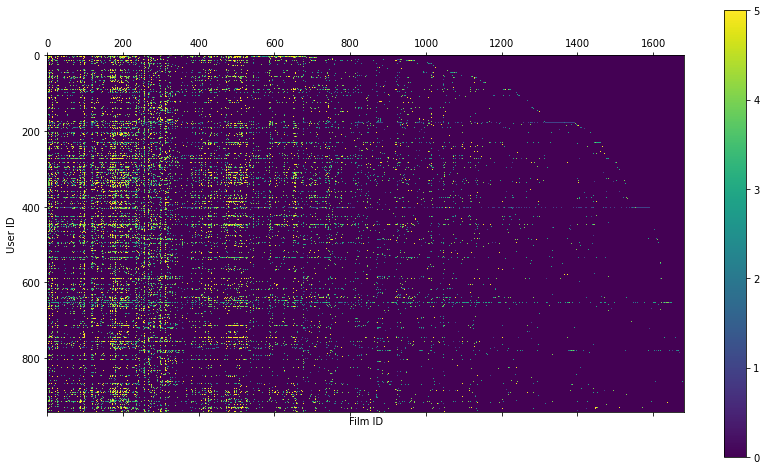

In [ ]:
#gerate matrix (this can be done more efficiently!)
R=np.zeros((np.shape(users)[0],np.shape(movies)[0]))
for i in range(np.shape(ratings)[0]):
    R[ratings['user_id'][i]-1, ratings['movie_id'][i]-1]=ratings['rating'][i]

#N = np.random.rand(100,100)
#N = N*5

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.matshow(R)
plt.xlabel('Film ID')
plt.ylabel('User ID')
plt.colorbar()

In [ ]:
epsilon=0.0000001 
def CosineDist(a,b):
    return a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b)+epsilon) #added epsilon for numerical stability: avoiding div by zero -> NaN

In [ ]:
%%time
#again, implementation not efficient: better use lamda opperators 
D=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D[i,j]=CosineDist(R[:,i],R[:,j])

CPU times: user 2min 41s, sys: 397 ms, total: 2min 42s
Wall time: 3min


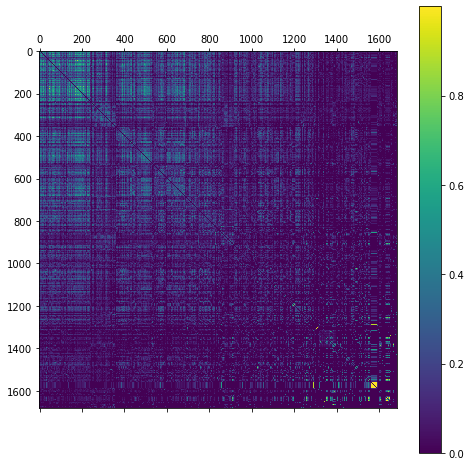

In [ ]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.matshow(D)
plt.colorbar() 

In [ ]:
def getTopN(movie_id, D, N=5):
    return D[movie_id,:].argsort()[-N:]

def getIDbyName(name):
    if np.size(movies.movie_id[movies.title.str.contains(name)]) > 0:
        m = int(movies.movie_id[movies.title.str.contains(name)][:1]), str(movies.title[movies.title.str.contains(name)][:1])
        return m[0]-1
    else:
        return -1
    
def getNameByID(IDs):
    res=movies.iloc[IDs]
    return res.title

def CII(title, D):
    if getIDbyName(title) > 0:
        print ("recommending movies for: '" + str(getNameByID(getIDbyName(title)))+"'")
        return getNameByID(getTopN(getIDbyName(title),D))[::-1]
    else:
        print ("no movie title containing " + str(title) + "found...")
        
def Score_byID(ID, D, Test):
    #print ("Hit Scores for: ", getNameByID(ID))
    res_id = getTopN(ID,D)[::-1]
    res_title = getNameByID(getTopN(ID,D))[::-1]
    res_score = Test[res_id]
    return res_id, res_title, res_score, np.mean(res_score)
    
#compute scores for all test users
def test_Score(D_train, R_test):
    userScores=[]
    for i in range(R_test.shape[0]):
        userScore=0
        userTop = np.argsort(R_test[i])[-5:]
        for e in userTop:
            res_id, res_title, res_score, av_score = Score_byID(e,D_train, R_test[i])
            userScore+=av_score
        userScores.append(userScore/(5))
    return userScores

## 4.1 Alternative Distance Measures
Implement a different distance measure, e.g. eucledian and compare the ressults.

###Cosine-Distance
$d_{cos}(\vec{a},\vec{b})=\frac{<\vec{a},\vec{b}>}{|\vec{a}||\vec{b}|}$

In [ ]:
epsilon=0.0000001 
def CosineDist(a,b):
    return a.dot(b)/(np.linalg.norm(a)*np.linalg.norm(b)+epsilon) #added epsilon for numerical stability: avoiding div by zero -> NaN

###Euclidean-Distance
$d_{euc}(\vec{a},\vec{b})=\sqrt{(\vec{b_0}-\vec{a_0})^2+(\vec{b_1}-\vec{a_1})^2}$

In [118]:
from scipy.spatial import distance
#from math import sqrt
def EuclideanDist(a,b):
    return  distance.euclidean(a,b)#np.linalg.norm(a-b)

###Testing

In [116]:
%%time
#again, implementation not efficient: better use lamda opperators 
D_euc=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D_euc[i,j]=EuclideanDist(R[:,i],R[:,j])


CPU times: user 2min 1s, sys: 307 ms, total: 2min 2s
Wall time: 2min 4s


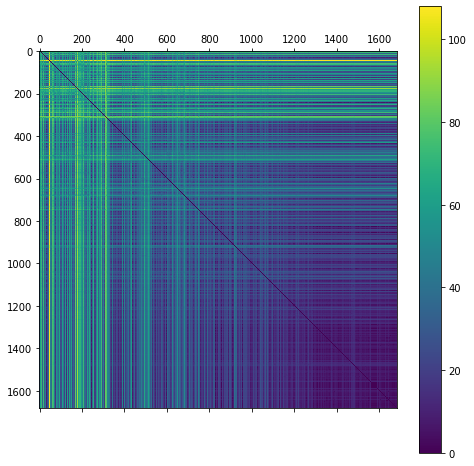

In [117]:
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.matshow(D_euc)
plt.colorbar() 

In [133]:
CII("Star",D)

recommending movies for: 'Star Wars (1977)'


180          Return of the Jedi (1983)
173     Raiders of the Lost Ark (1981)
171    Empire Strikes Back, The (1980)
0                     Toy Story (1995)
126              Godfather, The (1972)
Name: title, dtype: object

In [132]:
CII("Star",D_euc)

recommending movies for: 'Star Wars (1977)'


989              Anna Karenina (1997)
1061    Four Days in September (1997)
1126          Truman Show, The (1998)
937        Smile Like Yours, A (1997)
1242               Night Flier (1997)
Name: title, dtype: object

## 4.2 Baseline Results
Implement and compare results of two very simple baseline methods 


###Random Recommendation
* random recommendations: randomly recommend 5 movies (HINT user np.random sub-library to generate random movie IDs)

In [135]:
IDs_max = np.shape(movies)[0]
R_IDs = np.random.rand(5)*IDs_max
R_N = getNameByID(R_IDs)
R_N

1278                       Wild America (1997)
845     To Gillian on Her 37th Birthday (1996)
1222                   King of the Hill (1993)
126                      Godfather, The (1972)
362                        Sudden Death (1995)
Name: title, dtype: object

recommending movies for: 'Star Wars (1977)'


1144                 Blue Chips (1994)
85      Remains of the Day, The (1993)
236               Jerry Maguire (1996)
1551                Hunted, The (1995)
1167              Little Buddha (1993)
Name: title, dtype: object

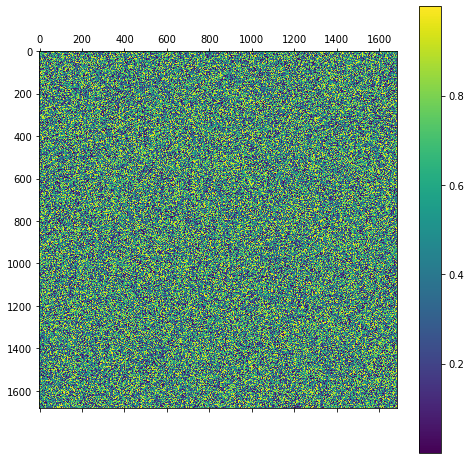

In [ ]:
D_rand = np.random.rand(np.shape(movies)[0],np.shape(movies)[0])

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.matshow(D_rand)
plt.colorbar() 

CII("Star",D_rand)

In [113]:
from sklearn.model_selection import train_test_split

R_train, R_test = train_test_split(R, test_size=0.1)

In [120]:
D_cos=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D_cos[i,j]=CosineDist(R_train[:,i],R_train[:,j])

In [110]:
D_euc=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D_euc[i,j]=EuclideanDist(R_train[:,i],R_train[:,j])

In [126]:
D_ran=np.zeros((np.shape(movies)[0],np.shape(movies)[0]))
for i in range(0,np.shape(movies)[0]):
    for j in range(0,np.shape(movies)[0]):
        if i!=j:
            D_ran[i,j]=np.random.rand(1)*100

In [128]:
np.argsort(R_test[23])[-5:]

array([194, 198, 199, 175,   0])

####Results

2.0261052631578953

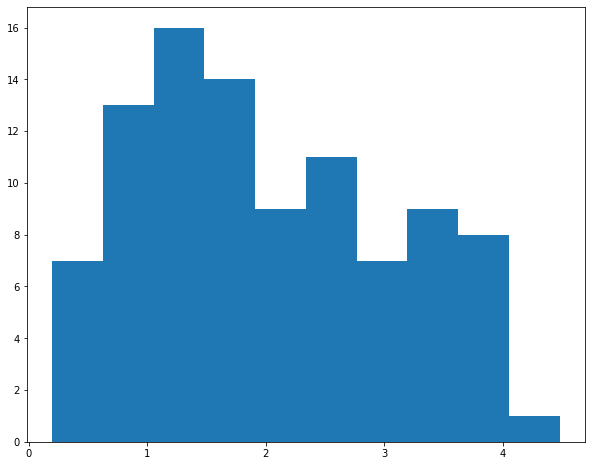

In [129]:
test_res=test_Score(D_cos,R_test)
plt.hist(test_res)
np.mean(test_res)

1.3570526315789475

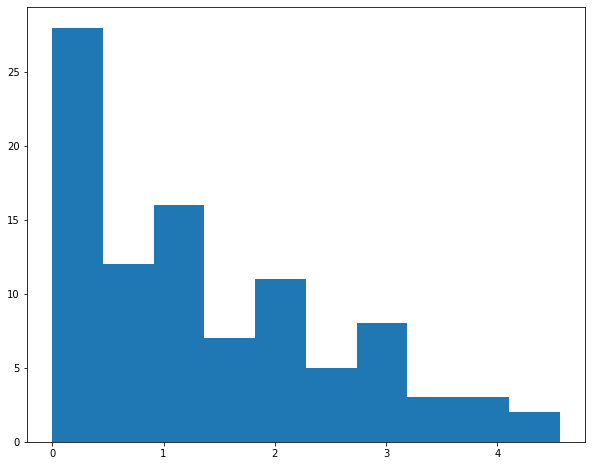

In [130]:
test_res=test_Score(D_euc,R_test)
plt.hist(test_res)
np.mean(test_res)

0.2290526315789474

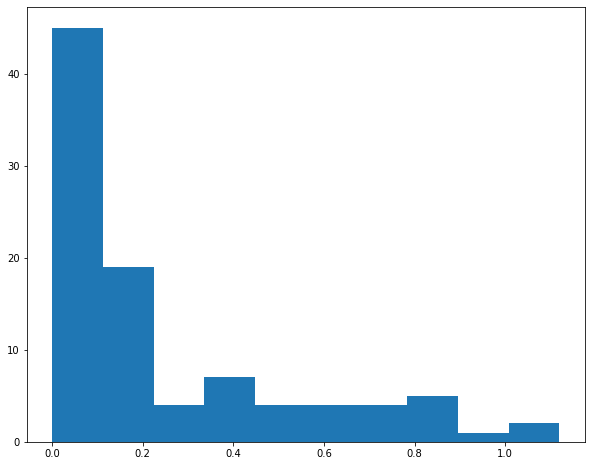

In [131]:
test_res=test_Score(D_ran,R_test)
plt.hist(test_res)
np.mean(test_res)

###Always Recommending
* always recommending the top 5 movies: HINT: need to find the IDs of the top 5 movies over all users first

In [136]:
ID = 200

R_Top5_IDs = getTopN(ID, D, 5)
R_Top5 = getNameByID(R_Top5_IDs)
R_Top5

558         Interview with the Vampire (1994)
435    American Werewolf in London, An (1981)
199                       Shining, The (1980)
218         Nightmare on Elm Street, A (1984)
183                   Army of Darkness (1993)
Name: title, dtype: object

## 4.3 SVD
Implement the SVD approach using *Surprise* (see lab intro)
* compare the results


In [ ]:
!pip install scikit-surprise
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise import accuracy
from surprise.model_selection import train_test_split
